# Econometrics

# 6th Session

# Unbiasedness and Consistency of Ordinary Least Squares Estimators

### for loops and lists

In [50]:
to_be_filled = []

for i in range(1, 10):
    a = i ** 2
    to_be_filled.append(a)

print(to_be_filled)

[1, 4, 9, 16, 25, 36, 49, 64, 81]


#### we don't need to define a local variable

In [51]:
to_be_filled = []

for i in range(1, 10):
    to_be_filled.append("hi")

print(to_be_filled)

['hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi']


### we can append to two lists at the same time

In [52]:
first_list = []
second_list = []

for i in range(1, 10):
    a = i ** 2
    b = "hi"
    first_list.append(a)
    second_list.append(b)

print(first_list)
print(second_list)

[1, 4, 9, 16, 25, 36, 49, 64, 81]
['hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi']


In [53]:
first_list = []
second_list = []

for i in range(1, 10):
    first_list.append(i ** 2)
    second_list.append("hi")

print(first_list)
print(second_list)

[1, 4, 9, 16, 25, 36, 49, 64, 81]
['hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi']


# generating pop


In [54]:
import numpy as np

In [ ]:
np.random.seed(37)
n = 10000
X1 = np.random.laplace(0, 14, n)
X2 = np.random.gamma(2, 2, n)
epsilon = np.random.normal(0, 1, n)

alpha = 0.7
beta1 = 1.2
beta2 = 1.7

Y_pop = alpha + beta1 * X1.flatten() + beta2 * X2.flatten() + epsilon

# correlations

### correlations between Y and X1

In [56]:
np.corrcoef(Y_pop, X1.flatten())

array([[1.        , 0.97912269],
       [0.97912269, 1.        ]])

#### second row first element -> [1] then [0]

In [57]:
print(f"The correlation between Y and X1 {np.corrcoef(Y_pop, X1.flatten())[1, 0]}")

The correlation between Y and X1 0.9791226925836373


### correlations between Y and X1

In [58]:
np.corrcoef(Y_pop, X2.flatten())

array([[1.        , 0.19754051],
       [0.19754051, 1.        ]])

In [59]:
print(f"The correlation between Y and X2 {np.corrcoef(Y_pop, X2.flatten())[1, 0]}")

The correlation between Y and X2 0.1975405095037809


### correlations between X2 and X1

In [60]:
np.corrcoef(X1.flatten(), X2.flatten())

array([[ 1.        , -0.00166546],
       [-0.00166546,  1.        ]])

## Y, X1, and X2 Histograms

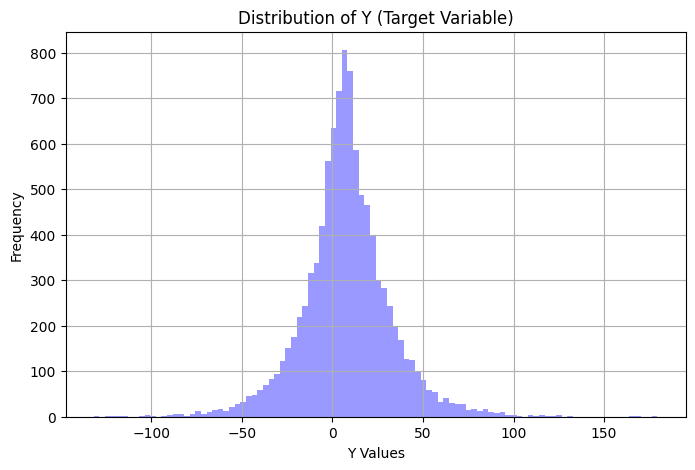

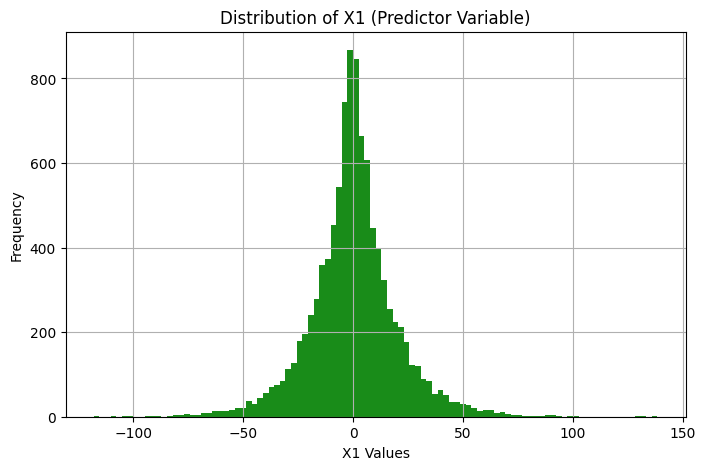

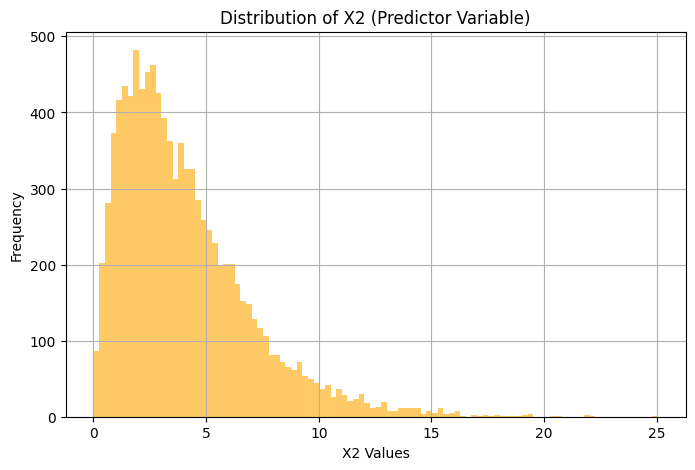

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(Y_pop, bins=100, color='blue', alpha=0.4)
plt.title("Distribution of Y (Target Variable)")
plt.xlabel("Y Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(X1, bins=100, color='green', alpha=0.9)
plt.title("Distribution of X1 (Predictor Variable)")
plt.xlabel("X1 Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(X2, bins=100, color='orange', alpha=0.6)
plt.title("Distribution of X2 (Predictor Variable)")
plt.xlabel("X2 Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# OLS (*) 

### The population is created by
### $Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \epsilon$

In [62]:
np.random.seed(22)
n = 10000
X1 = np.random.laplace(0, 14, n)
X2 = np.random.gamma(2, 2, n)
epsilon = np.random.normal(0, 1, n)

alpha = 0.7
beta1 = 1.2
beta2 = 1.7

Y_pop = alpha + beta1 * X1.flatten() + beta2 * X2.flatten() + epsilon


### Sample size and indices

In [63]:
np.random.seed(22)
sample_size = 100
indices = np.random.choice(10000, sample_size, replace=False)

X1_sample = X1[indices]
X2_sample = X2[indices]
Y_sample = Y_pop[indices]

### Reshape for regression


In [64]:
X1_sample_reshaped = X1_sample.reshape(100, 1)
X2_sample_reshaped = X2_sample.reshape(100, 1)
Y_sample_reshaped = Y_sample.reshape(100, 1)

### Add intercept and both predictors to the design matrix


In [65]:
X_sample_with_intercept = np.column_stack((np.ones(X1_sample_reshaped.shape[0]), X1_sample_reshaped, X2_sample_reshaped))

### Calculate coefficients


In [66]:
XTX_inv = np.linalg.inv(X_sample_with_intercept.T @ X_sample_with_intercept)
XTY = X_sample_with_intercept.T @ Y_sample_reshaped
intercept_and_slope = XTX_inv @ XTY
intercept_and_slope

array([[0.72306565],
       [1.20699931],
       [1.70389947]])

In [67]:
print(f"Intercept: {intercept_and_slope[0][0]}")
print(f"1st Coefficient: {intercept_and_slope[1][0]}")
print(f"2nd Coefficient: {intercept_and_slope[2][0]}")

Intercept: 0.723065653942529
1st Coefficient: 1.2069993053073873
2nd Coefficient: 1.703899465791803


## Var-Cov Matrix

### $Var(\hat\beta) = \sigma^2(X^T X)^{-1}$

### Step 1: Calculate the variance of residuals

In [68]:
residuals = Y_sample_reshaped - X_sample_with_intercept @ intercept_and_slope
residuals[:5]

array([[ 0.36182206],
       [-1.61718975],
       [ 0.07144471],
       [ 3.1882653 ],
       [-1.20903965]])

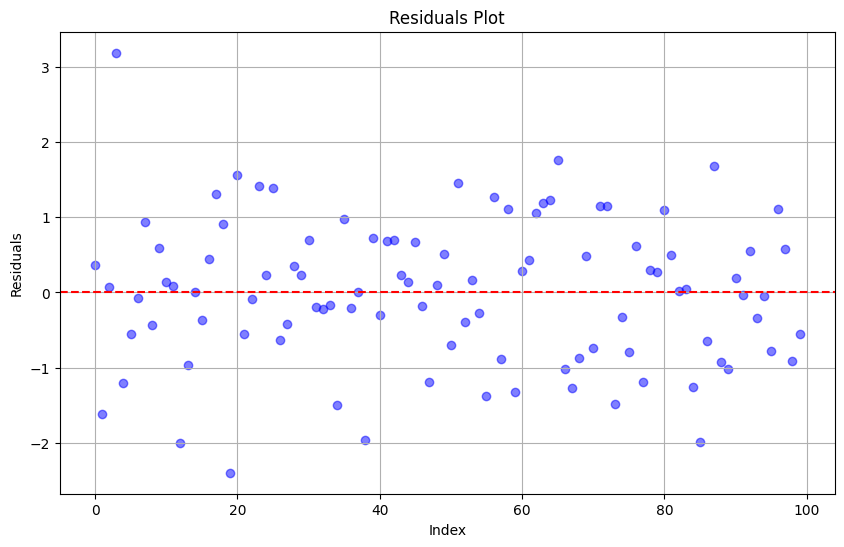

In [ ]:
Y_hat = X_sample_with_intercept @ intercept_and_slope

residuals = Y_sample_reshaped - Y_hat

plt.figure(figsize=(10, 6))
plt.scatter(range(sample_size), residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid()
plt.show()

In [70]:
sigma_squared = np.sum(residuals**2) / (sample_size - X_sample_with_intercept.shape[1])
sigma_squared

np.float64(0.9674508596374439)

### Or

In [71]:
np.var(residuals, ddof=X_sample_with_intercept.shape[1])

np.float64(0.967450859637444)

### Step 2: Multiply $\sigma^2$ by $(X^T X)^{-1}$

In [72]:
var_cov_matrix = sigma_squared * XTX_inv
print(f"Variance-Covariance Matrix:\n {var_cov_matrix}")


Variance-Covariance Matrix:
 [[ 3.17722018e-02 -1.64425491e-05 -5.45672870e-03]
 [-1.64425491e-05  3.04542154e-05 -1.45106736e-05]
 [-5.45672870e-03 -1.45106736e-05  1.35879499e-03]]


## Computing $R^2$

In [73]:
Y_mean = np.mean(Y_sample_reshaped)
SST = np.sum((Y_sample_reshaped - Y_mean) ** 2)
SSR = np.sum(residuals ** 2)

R_squared = 1 - (SSR / SST)
print(f"R-squared: {R_squared}")

R-squared: 0.9981265540888407


## Adjusted $R^2$

In [74]:
p = X_sample_with_intercept.shape[1] - 1  # Number of predictors (excluding intercept)
adjusted_R_squared = 1 - ((1 - R_squared) * (sample_size - 1) / (sample_size - p - 1))
print(f"Adjusted R-squared: {adjusted_R_squared}")

Adjusted R-squared: 0.9980879263380951


## inference

### Standard Error of $(\hat\beta) = \sqrt{Var(\hat\beta)}$

#### np.diag()

In [75]:
A = np.random.randn(3, 3)
A

array([[-0.50637343, -1.85266618,  1.03516883],
       [-0.40338658, -0.56996362,  0.2619243 ],
       [ 0.63632612,  0.97350562,  1.50716665]])

In [76]:
np.diag(A)

array([-0.50637343, -0.56996362,  1.50716665])

In [77]:
standard_errors = np.sqrt(np.diag(var_cov_matrix))
print(f"Standard Errors of Coefficients: \n {standard_errors}")


Standard Errors of Coefficients: 
 [0.17824759 0.00551853 0.03686184]



- The second coefficient has a very small standard error meaning it is estimated with high precision.
- The first and third coefficients have larger standard errors, suggesting more variability in their estimation.

### Calculate t-statistics

### $t_i = \frac{\hat{\beta_i}}{\text{Standard Error of } \hat{\beta}}$

In [78]:
t_statistics = intercept_and_slope.flatten() / standard_errors
print("T-Statistics:")
print(t_statistics)

T-Statistics:
[  4.05652425 218.71738896  46.22394405]


- Higher absolute values indicate that the coefficient is statistically significant.
- The second coefficient is extremely significant.
- The first and third also have high t-statistics, meaning they are likely significant.

###  Calculate 95% confidence intervals

#### $\hat{\beta_i} + t_{\alpha / t} \times \text{Standard Error of } \hat{\beta}$
#### $\hat{\beta_i} - t_{\alpha / t} \times \text{Standard Error of } \hat{\beta}$

In [79]:
alpha = 0.05
t_critical = 1.96 

confidence_intervals = np.column_stack((
    intercept_and_slope.flatten() - t_critical * standard_errors,
    intercept_and_slope.flatten() + t_critical * standard_errors
))

print("95% Confidence Intervals:")
print(confidence_intervals)


95% Confidence Intervals:
[[0.37370039 1.07243092]
 [1.19618298 1.21781563]
 [1.63165027 1.77614867]]


- The first and third coefficients have wider intervals, meaning more uncertainty in their estimation.


## Unbiasedness

In [80]:
np.random.seed(37)
n = 10000
X1 = np.random.laplace(0, 14, n)
X2 = np.random.gamma(2, 2, n)
epsilon = np.random.normal(0, 1, n)

alpha = 0.7
beta1 = 1.2
beta2 = 1.7

Y_pop = alpha + beta1 * X1.flatten() + beta2 * X2.flatten() + epsilon

num_iterations = 100
sample_size = 100

intercepts = []
slopes1 = []
slopes2 = []

for _ in range(num_iterations):
    indices = np.random.choice(n, sample_size, replace=False)

    X1_sample = X1[indices]
    X2_sample = X2[indices]
    Y_sample = Y_pop[indices]  

    X_sample_with_intercept = np.column_stack((np.ones(sample_size), X1_sample, X2_sample.flatten()))

    XTX_inv = np.linalg.inv(X_sample_with_intercept.T @ X_sample_with_intercept)
    XTY = X_sample_with_intercept.T @ Y_sample
    intercept_and_slope = XTX_inv @ XTY

    intercepts.append(intercept_and_slope[0])
    slopes1.append(intercept_and_slope[1])
    slopes2.append(intercept_and_slope[2])

avg_intercept = np.mean(intercepts)
avg_slope1 = np.mean(slopes1)
avg_slope2 = np.mean(slopes2)

print(f"Average Intercept: {avg_intercept}")
print(f"Average Slope 1: {avg_slope1}")
print(f"Average Slope 2: {avg_slope2}")


Average Intercept: 0.6595201027882086
Average Slope 1: 1.2009742392758027
Average Slope 2: 1.7107710268392835


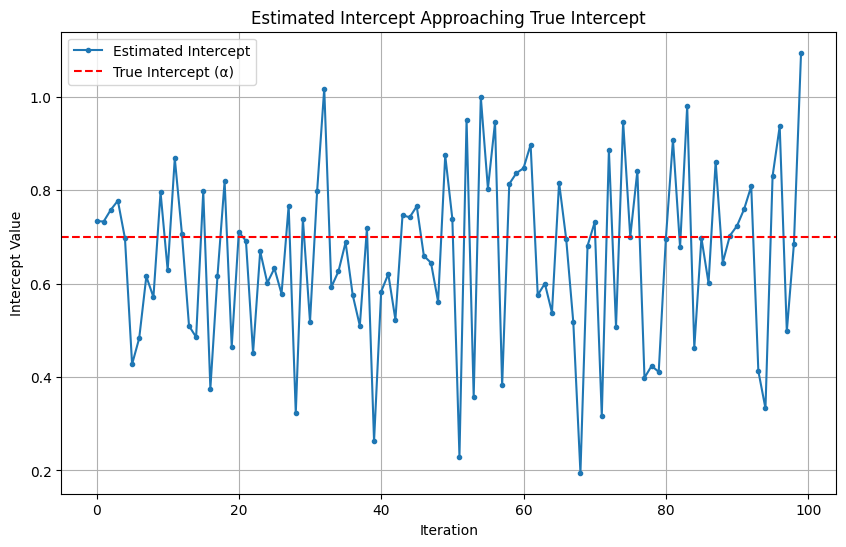

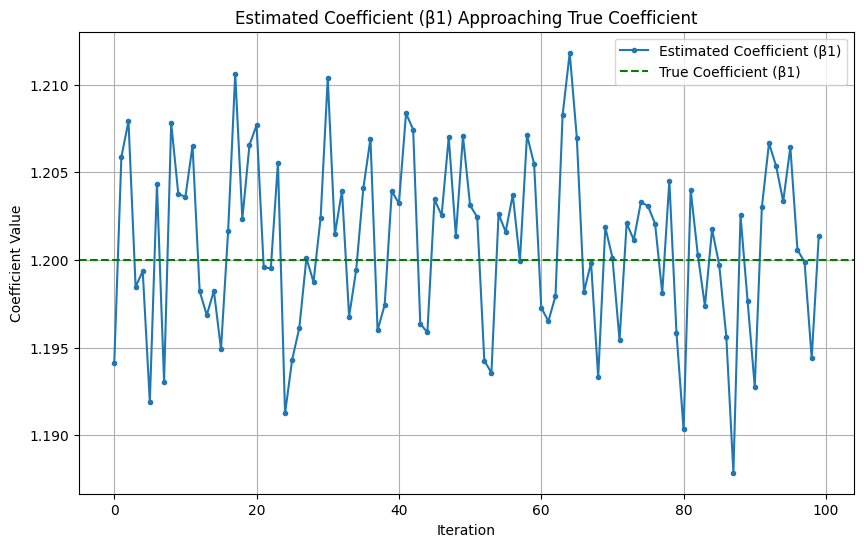

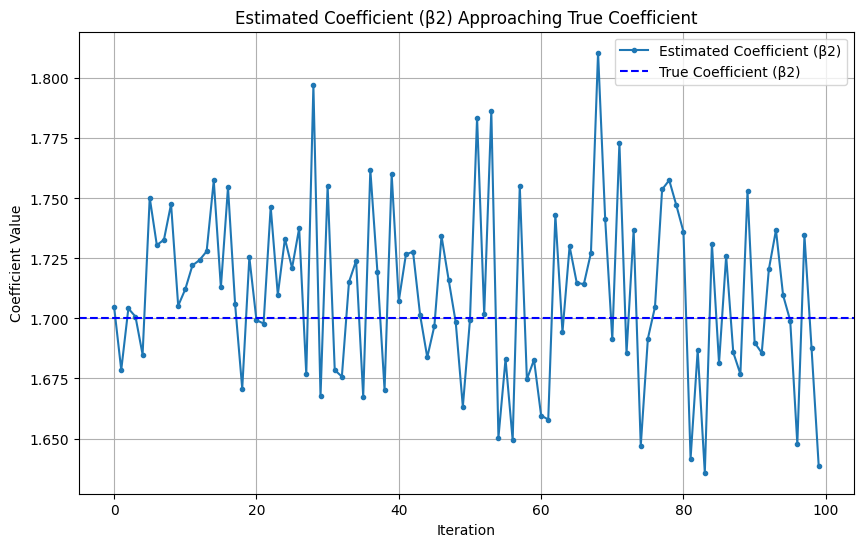

In [81]:
beta_hats_intercepts = intercepts  
beta_hats_coefficients_1 = slopes1 
beta_hats_coefficients_2 = slopes2  

true_betas = [0.7, 1.2, 1.7]  

plt.figure(figsize=(10, 6))
plt.plot(beta_hats_intercepts, label='Estimated Intercept', marker='o', markersize=3)
plt.axhline(y=true_betas[0], color='r', linestyle='--', label='True Intercept (α)')
plt.title('Estimated Intercept Approaching True Intercept')
plt.xlabel('Iteration')
plt.ylabel('Intercept Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(beta_hats_coefficients_1, label='Estimated Coefficient (β1)', marker='o', markersize=3)
plt.axhline(y=true_betas[1], color='g', linestyle='--', label='True Coefficient (β1)')
plt.title('Estimated Coefficient (β1) Approaching True Coefficient')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(beta_hats_coefficients_2, label='Estimated Coefficient (β2)', marker='o', markersize=3)
plt.axhline(y=true_betas[2], color='b', linestyle='--', label='True Coefficient (β2)')
plt.title('Estimated Coefficient (β2) Approaching True Coefficient')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()


# Consistency

Sample Size: 50
Average Estimated Slope β1: 1.198119477532555, Variance: 4.2938843673432786e-05
Average Estimated Slope β2: 1.6830370069873382, Variance: 0.004769778856150827
Average Estimated Intercept α: 0.6974226282195702, Variance: 0.11638472327057274

Sample Size: 100
Average Estimated Slope β1: 1.1996755198168465, Variance: 3.2582141266000214e-05
Average Estimated Slope β2: 1.7186828378167962, Variance: 0.0009397022513284169
Average Estimated Intercept α: 0.605710092947079, Variance: 0.012661604669607349

Sample Size: 200
Average Estimated Slope β1: 1.201700964378395, Variance: 1.2629120921767934e-05
Average Estimated Slope β2: 1.7036805472236671, Variance: 0.0005107336602915805
Average Estimated Intercept α: 0.6994314851498193, Variance: 0.021763507631405887

Sample Size: 400
Average Estimated Slope β1: 1.2011848082631909, Variance: 5.49664357606787e-06
Average Estimated Slope β2: 1.7015887863007029, Variance: 0.00011142690814442671
Average Estimated Intercept α: 0.6800766375802

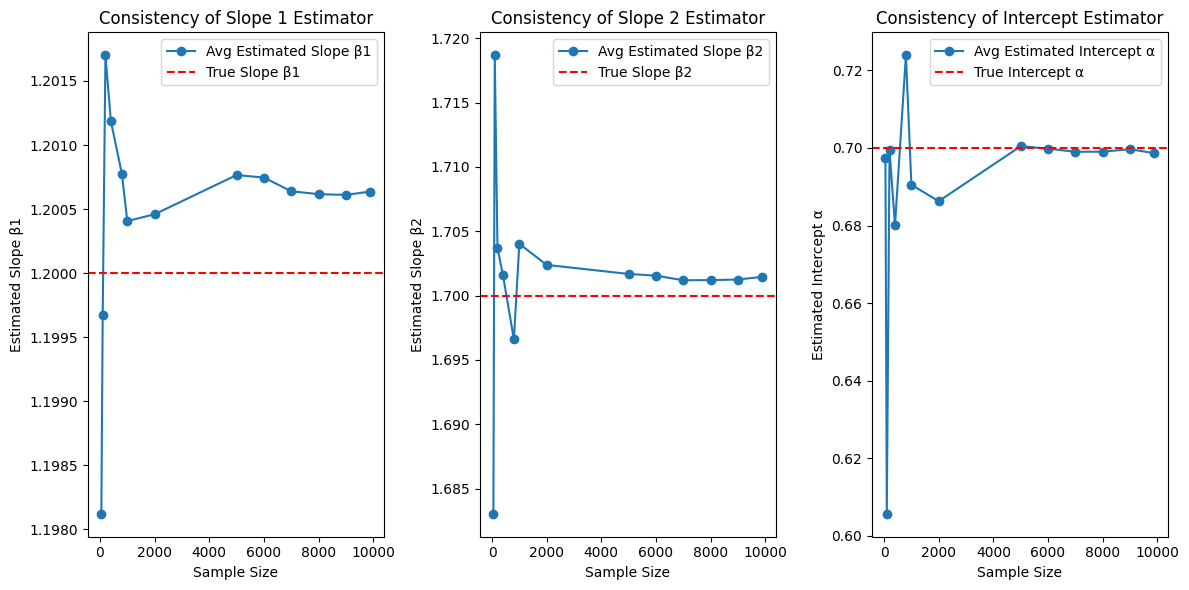

In [82]:
np.random.seed(42) 
n = 10000  

X1 = np.random.laplace(0, 14, n)
X2 = np.random.gamma(2, 2, n)

alpha = 0.7
beta1 = 1.2
beta2 = 1.7

epsilon = np.random.normal(0, 1, n)
Y_pop = alpha + beta1 * X1.flatten() + beta2 * X2.flatten() + epsilon

X1_reshaped = X1.reshape(-1, 1)
X2_reshaped = X2.reshape(-1, 1)

X_with_intercept = np.hstack((np.ones((n, 1)), X1_reshaped, X2_reshaped))

num_iterations = 15
sample_sizes = [50, 100, 200, 400, 800, 1000, 2000, 5000, 6000, 7000, 8000, 9000, 9890]

estimated_slopes1 = []
estimated_slopes2 = []
estimated_intercepts = []

average_slopes1 = []
average_slopes2 = []
average_intercepts = []
variances_slopes1 = []
variances_slopes2 = []
variances_intercepts = []

for sample_size in sample_sizes:
    slopes1 = []
    slopes2 = []
    intercepts = []
    
    for _ in range(num_iterations):
        indices = np.random.choice(n, sample_size, replace=False)  
        X_sample = X_with_intercept[indices]
        Y_sample = Y_pop[indices]
        
    
        XTX_inv = np.linalg.inv(X_sample.T @ X_sample)
        beta_hat = XTX_inv @ (X_sample.T @ Y_sample)

        intercepts.append(beta_hat[0])
        slopes1.append(beta_hat[1])
        slopes2.append(beta_hat[2])
    
    estimated_intercepts.append(intercepts)
    estimated_slopes1.append(slopes1)
    estimated_slopes2.append(slopes2)

    average_intercepts.append(np.mean(intercepts))
    average_slopes1.append(np.mean(slopes1))
    average_slopes2.append(np.mean(slopes2))

    variances_intercepts.append(np.var(intercepts, ddof=1))
    variances_slopes1.append(np.var(slopes1, ddof=1))
    variances_slopes2.append(np.var(slopes2, ddof=1))

for i, sample_size in enumerate(sample_sizes):
    print(f"Sample Size: {sample_size}")
    print(f"Average Estimated Slope β1: {average_slopes1[i]}, Variance: {variances_slopes1[i]}")
    print(f"Average Estimated Slope β2: {average_slopes2[i]}, Variance: {variances_slopes2[i]}")
    print(f"Average Estimated Intercept α: {average_intercepts[i]}, Variance: {variances_intercepts[i]}")
    print()

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(sample_sizes, average_slopes1, marker='o', label='Avg Estimated Slope β1')
plt.axhline(y=beta1, color='r', linestyle='--', label='True Slope β1')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Slope β1')
plt.title('Consistency of Slope 1 Estimator')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(sample_sizes, average_slopes2, marker='o', label='Avg Estimated Slope β2')
plt.axhline(y=beta2, color='r', linestyle='--', label='True Slope β2')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Slope β2')
plt.title('Consistency of Slope 2 Estimator')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(sample_sizes, average_intercepts, marker='o', label='Avg Estimated Intercept α')
plt.axhline(y=alpha, color='r', linestyle='--', label='True Intercept α')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Intercept α')
plt.title('Consistency of Intercept Estimator')
plt.legend()

plt.tight_layout()
plt.show()


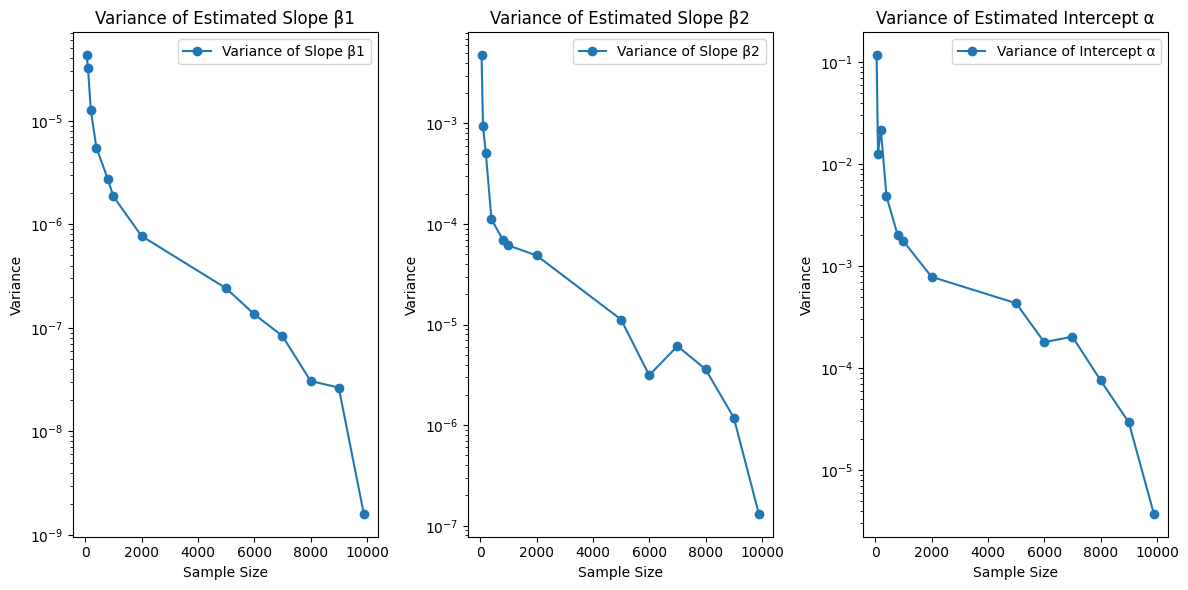

In [83]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(sample_sizes, variances_slopes1, marker='o', label='Variance of Slope β1')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Estimated Slope β1')
plt.legend()
plt.yscale('log') 

plt.subplot(1, 3, 2)
plt.plot(sample_sizes, variances_slopes2, marker='o', label='Variance of Slope β2')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Estimated Slope β2')
plt.legend()
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.plot(sample_sizes, variances_intercepts, marker='o', label='Variance of Intercept α')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Estimated Intercept α')
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()


In [84]:
print(f"The minimum variance of intercept is: {min(variances_intercepts)},the minimum variance of beta1 is {min(variances_slopes1)}, the minimum variance of beta2 is {min(variances_slopes2)}")

The minimum variance of intercept is: 3.717598005936448e-06,the minimum variance of beta1 is 1.5997636449933741e-09, the minimum variance of beta2 is 1.3140596515791935e-07


# introducing bias
## Endogeneity: 

#### Endogeneity occurs when an independent variable is correlated with the error term 𝜖. This leads to biased estimates because the assumption of independent errors (in Ordinary Least Squares, OLS) is violated.

In [85]:
np.random.seed(37)
n = 10000
X1 = np.random.laplace(0, 14, n)
X2 = np.random.gamma(2, 2, n)
gamma1 = 0.5 
gamma2 = 0.3  

alpha = 0.7
beta1 = 1.2
beta2 = 1.7

epsilon = np.random.normal(0, 1, n) + gamma1 * X1.flatten() + gamma2 * X2.flatten()

Y_pop = alpha + beta1 * X1.flatten() + beta2 * X2.flatten() + epsilon

num_iterations = 100
sample_size = 100

intercepts = []
slopes1 = []
slopes2 = []

for _ in range(num_iterations):
    indices = np.random.choice(n, sample_size, replace=False)

    X1_sample = X1[indices]
    X2_sample = X2[indices]
    Y_sample = Y_pop[indices]  

    X_sample_with_intercept = np.column_stack((np.ones(sample_size), X1_sample, X2_sample.flatten()))

    XTX_inv = np.linalg.inv(X_sample_with_intercept.T @ X_sample_with_intercept)
    XTY = X_sample_with_intercept.T @ Y_sample
    intercept_and_slope = XTX_inv @ XTY

    intercepts.append(intercept_and_slope[0])
    slopes1.append(intercept_and_slope[1])
    slopes2.append(intercept_and_slope[2])

avg_intercept = np.mean(intercepts)
avg_slope1 = np.mean(slopes1)
avg_slope2 = np.mean(slopes2)

print(f"Average Intercept: {avg_intercept}")
print(f"Average Slope 1: {avg_slope1}")
print(f"Average Slope 2: {avg_slope2}")


Average Intercept: 0.6595201027882092
Average Slope 1: 1.7009742392758027
Average Slope 2: 2.010771026839283


Sample Size: 50
Average Estimated Slope β1: 1.6979134795351654, Variance: 5.5172385735455946e-05
Average Estimated Slope β2: 2.130742437885419, Variance: 0.2702681150833172
Average Estimated Intercept α: 0.6618031863284634, Variance: 0.06855013179194071

Sample Size: 100
Average Estimated Slope β1: 1.6995702000485777, Variance: 3.209871706564519e-05
Average Estimated Slope β2: 2.100415210445723, Variance: 0.2417187254382515
Average Estimated Intercept α: 0.6806076245987128, Variance: 0.04116735853209236

Sample Size: 200
Average Estimated Slope β1: 1.7026705601441625, Variance: 1.225415582054913e-05
Average Estimated Slope β2: 1.9615044294932606, Variance: 0.045577131237973696
Average Estimated Intercept α: 0.7014862048204145, Variance: 0.019089565243077148

Sample Size: 400
Average Estimated Slope β1: 1.6997258077043333, Variance: 5.31311191974703e-06
Average Estimated Slope β2: 2.0833571589067743, Variance: 0.012927542424669815
Average Estimated Intercept α: 0.6648913209229357, Varia

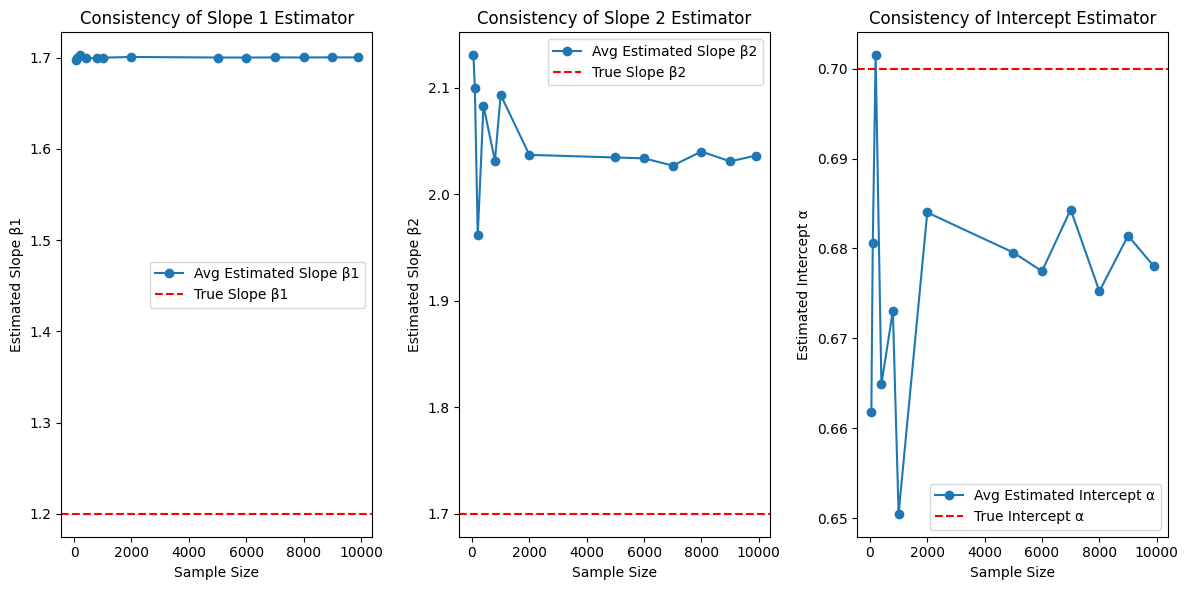

In [86]:
np.random.seed(37)
n = 10000
X1 = np.random.laplace(0, 14, n)
X2 = np.random.rand(n, 1)

gamma1 = 0.5  
gamma2 = 0.3 

alpha = 0.7
beta1 = 1.2
beta2 = 1.7

epsilon = np.random.normal(0, 1, n) + gamma1 * X1.flatten() + gamma2 * X2.flatten()

Y_pop = alpha + beta1 * X1.flatten() + beta2 * X2.flatten() + epsilon

X1_reshaped = X1.reshape(-1, 1)
X2_reshaped = X2.reshape(-1, 1)

X_with_intercept = np.hstack((np.ones((n, 1)), X1_reshaped, X2_reshaped))

num_iterations = 15
sample_sizes = [50, 100, 200, 400, 800, 1000, 2000, 5000, 6000, 7000, 8000, 9000, 9890]

average_slopes1 = []
average_slopes2 = []
average_intercepts = []
variances_slopes1 = []
variances_slopes2 = []
variances_intercepts = []

for sample_size in sample_sizes:
    estimated_slopes1 = []
    estimated_slopes2 = []
    estimated_intercepts = []
    
    for _ in range(num_iterations):
        indices = np.random.choice(n, sample_size, replace=False)  
        X_sample = X_with_intercept[indices]
        Y_sample = Y_pop[indices]
        
        XTX_inv = np.linalg.inv(X_sample.T @ X_sample)
        beta_hat = XTX_inv @ (X_sample.T @ Y_sample)

        estimated_intercepts.append(beta_hat[0])
        estimated_slopes1.append(beta_hat[1])
        estimated_slopes2.append(beta_hat[2])

    average_intercepts.append(np.mean(estimated_intercepts))
    average_slopes1.append(np.mean(estimated_slopes1))
    average_slopes2.append(np.mean(estimated_slopes2))

    variances_intercepts.append(np.var(estimated_intercepts, ddof=1))
    variances_slopes1.append(np.var(estimated_slopes1, ddof=1))
    variances_slopes2.append(np.var(estimated_slopes2, ddof=1))

for i, sample_size in enumerate(sample_sizes):
    print(f"Sample Size: {sample_size}")
    print(f"Average Estimated Slope β1: {average_slopes1[i]}, Variance: {variances_slopes1[i]}")
    print(f"Average Estimated Slope β2: {average_slopes2[i]}, Variance: {variances_slopes2[i]}")
    print(f"Average Estimated Intercept α: {average_intercepts[i]}, Variance: {variances_intercepts[i]}")
    print()

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(sample_sizes, average_slopes1, marker='o', label='Avg Estimated Slope β1')
plt.axhline(y=beta1, color='r', linestyle='--', label='True Slope β1')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Slope β1')
plt.title('Consistency of Slope 1 Estimator')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(sample_sizes, average_slopes2, marker='o', label='Avg Estimated Slope β2')
plt.axhline(y=beta2, color='r', linestyle='--', label='True Slope β2')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Slope β2')
plt.title('Consistency of Slope 2 Estimator')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(sample_sizes, average_intercepts, marker='o', label='Avg Estimated Intercept α')
plt.axhline(y=alpha, color='r', linestyle='--', label='True Intercept α')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Intercept α')
plt.title('Consistency of Intercept Estimator')
plt.legend()

plt.tight_layout()
plt.show()


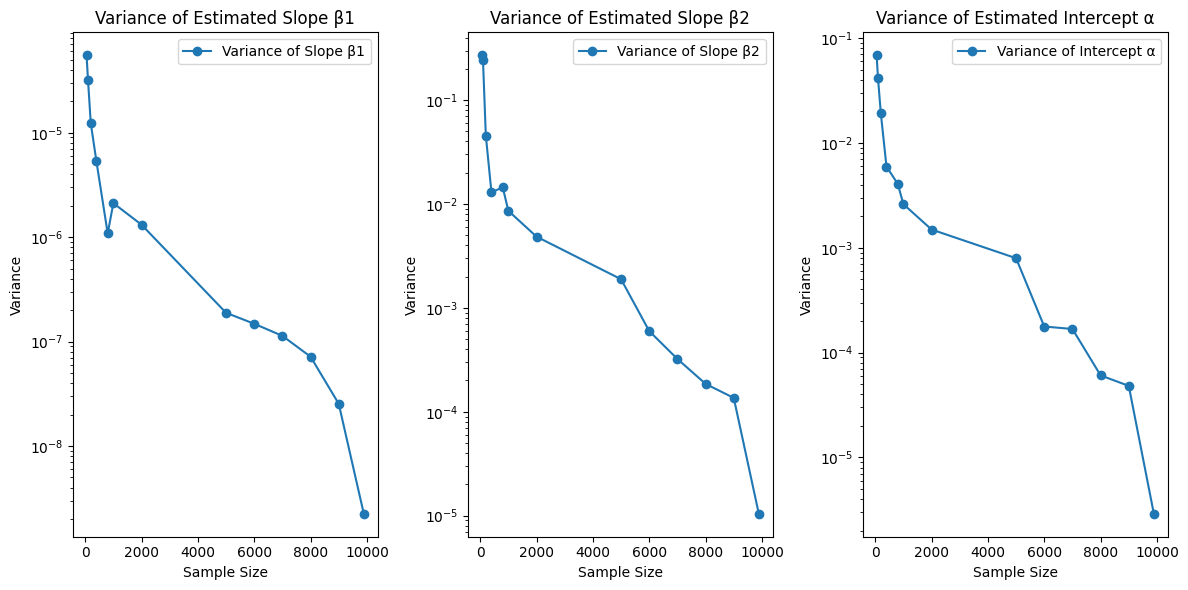

In [87]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(sample_sizes, variances_slopes1, marker='o', label='Variance of Slope β1')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Estimated Slope β1')
plt.legend()
plt.yscale('log')  

plt.subplot(1, 3, 2)
plt.plot(sample_sizes, variances_slopes2, marker='o', label='Variance of Slope β2')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Estimated Slope β2')
plt.legend()
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.plot(sample_sizes, variances_intercepts, marker='o', label='Variance of Intercept α')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Estimated Intercept α')
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()


In [88]:
print(f"The minimum variance of intercept is: {min(variances_intercepts)},the minimum variance of beta1 is {min(variances_slopes1)}, the minimum variance of beta2 is {min(variances_slopes2)}")

The minimum variance of intercept is: 2.9028711089730604e-06,the minimum variance of beta1 is 2.2411197227400414e-09, the minimum variance of beta2 is 1.041698233584353e-05


### By comparing the variances from the two simulations—one without endogeneity and one with endogeneity—we observe that the variances of the estimators increased in the presence of endogeneity. However, the variance of the intercept decreased after introducing endogeneity.

# Exercise

## 1. Use the example from OLS(*) section and conduct the same OLS regression using statsmodels library

## 2. Introduce endogeneity into your model. Compare the Durbin-Watson (DW) statistic result from the first exercise with the result from this exercise.

Hint: You can use the np.column_stack() function to assist with this task!